# ¿Cómo te sientes? - Parte I
Muchas veces asociamos a los humanos un nivel superior que a las máquinas en habilidades sociales como la comunicación o la empatía. En cuanto a la primera está quedando claro que no está tan claro con modelos como GPT4, en cuanto a la segunda, es la intención de este tutorial dar un atisbo al lector, como no están tan lejos.


resources: https://www.kaggle.com/datasets/jonathanoheix/face-expression-recognition-dataset

### ¿Qué son las redes neuronales convolucionales?
Son un tipo de red neuronal dedicada a procesar imagenes. Bueno, en realidad no procesa las imagenes como tal, si no las matrices de información que componen una imagen. 

### ¿Cómo funcionan?
Funcionan recorriendo la imagen de forma secuencial, y extrayendo una serie de características internas a la representación. Características que pueden ser visualizadas como contornos o bodes. El proceso de extracción de información es aplicar 'filtros', que no son más que operaciones matriciales. Cada filtro corresponde a una matriz, con la que se opera cada subsección recorrida de la imagen

In [1]:
import os
import numpy as np
from PIL import Image
import matplotlib.pyplot as plt

In [2]:
base_dir = '/home/jd/Documentos/CODIGO/Machine-Learning/tutorials/how-do-you-feel?/resources/images/train'
subdirs  = ['angry','disgust','fear','happy','neutral','sad','surprise']
rutas    = {k:[] for k in subdirs}

for emotion in subdirs:
    directorio = os.path.join(base_dir, emotion)
    rutas_imagenes = [os.path.join(directorio, archivo) for archivo in os.listdir(directorio) if archivo.endswith('.jpg')]
    rutas[emotion] = rutas_imagenes

In [3]:
rutas['angry'][:5]

['/home/jd/Documentos/CODIGO/Machine-Learning/tutorials/how-do-you-feel?/resources/images/train/angry/0.jpg',
 '/home/jd/Documentos/CODIGO/Machine-Learning/tutorials/how-do-you-feel?/resources/images/train/angry/1.jpg',
 '/home/jd/Documentos/CODIGO/Machine-Learning/tutorials/how-do-you-feel?/resources/images/train/angry/10.jpg',
 '/home/jd/Documentos/CODIGO/Machine-Learning/tutorials/how-do-you-feel?/resources/images/train/angry/10002.jpg',
 '/home/jd/Documentos/CODIGO/Machine-Learning/tutorials/how-do-you-feel?/resources/images/train/angry/10016.jpg']

In [4]:
def visualizar_imagenes(rutas, label_, num_imagenes=5):
    plt.figure(figsize=(10, 10))
    for i, ruta in enumerate(rutas[:num_imagenes]):
        img = Image.open(ruta)
        plt.subplot(1, num_imagenes, i+1)
        plt.imshow(img)
        plt.title(label=label_)
        plt.axis('off')
    plt.show()

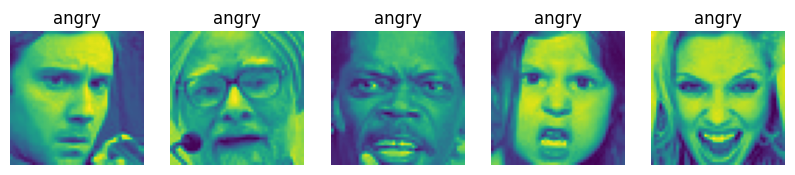

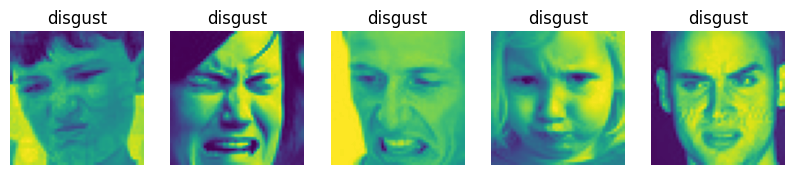

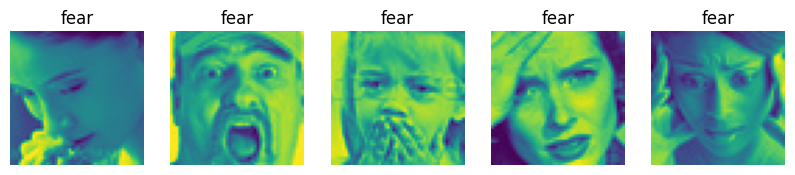

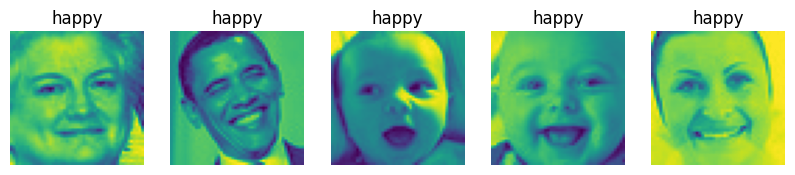

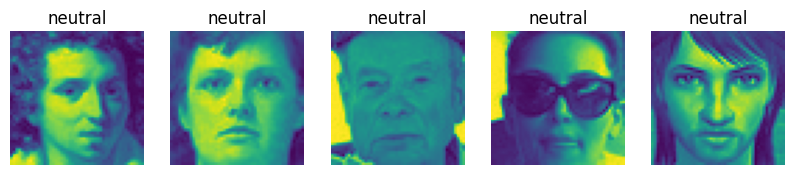

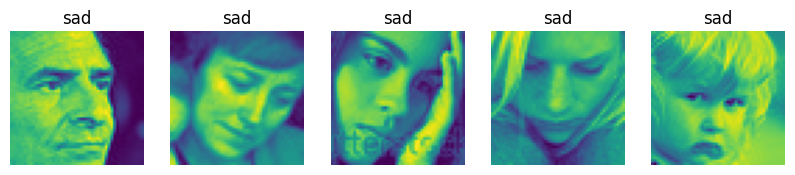

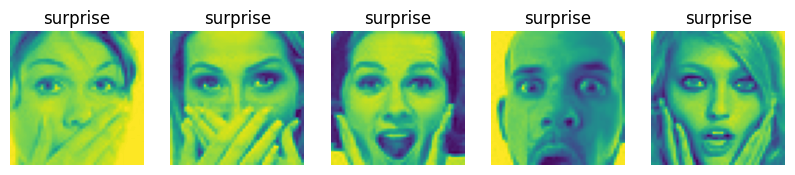

In [5]:
for emotion in subdirs:
    rutas_imagenes = rutas[emotion]
    visualizar_imagenes(rutas_imagenes, emotion, 5)

In [6]:
def aplicar_filtro_conv(imagen, filtro):
    
    # Convertir la imagen a escala de grises
    imagen_gris = np.array(imagen.convert("L"))
    
    # Obtener dimensiones de la imagen y del filtro
    alto_imagen, ancho_imagen = imagen_gris.shape
    alto_filtro, ancho_filtro = filtro.shape

    # Calcular las dimensiones de la imagen resultante
    alto_resultado = alto_imagen - alto_filtro + 1
    ancho_resultado = ancho_imagen - ancho_filtro + 1

    # Crear una imagen vacía para almacenar el resultado
    imagen_resultado = np.zeros((alto_resultado, ancho_resultado))

    # Aplicar la operación de convolución
    for i in range(alto_resultado):
        for j in range(ancho_resultado):
            # Extraer la región de la imagen original
            region = imagen_gris[i:i+alto_filtro, j:j+ancho_filtro]
            # Realizar la operación de convolución - devuelve un escalar
            resultado = np.sum(region * filtro)
            # Asignar el resultado a la imagen de salida
            imagen_resultado[i, j] = resultado

    return imagen_resultado

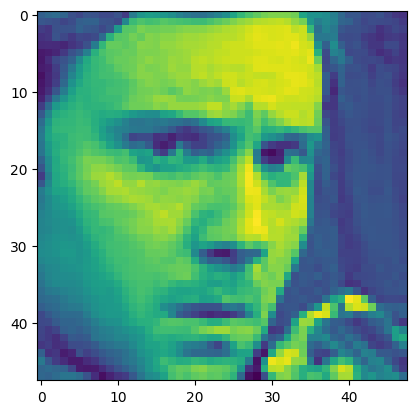

In [7]:
# Ejemplo de uso de la función
imagen = Image.open(rutas['angry'][0])
plt.imshow(imagen)

In [13]:
np.array(imagen).shape

(48, 48)

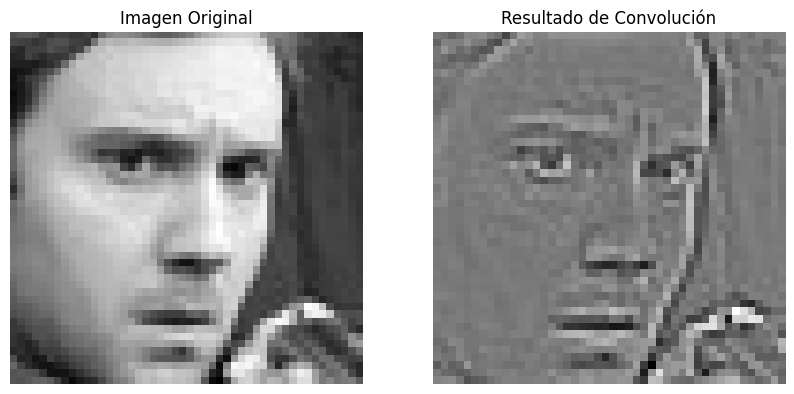

In [9]:
# Definir un filtro ejemplo (detección de bordes)
filtro = np.array([[-1, -1, -1],
                   [-1,  8, -1],
                   [-1, -1, -1]])

# Aplicar la convolución
resultado = aplicar_filtro_conv(imagen, filtro)

# Mostrar la imagen original y el resultado
plt.figure(figsize=(10, 5))
plt.subplot(1, 2, 1)
plt.imshow(imagen, cmap='gray')
plt.title('Imagen Original')
plt.axis('off')

plt.subplot(1, 2, 2)
plt.imshow(resultado, cmap='gray')
plt.title('Resultado de Convolución')
plt.axis('off')

plt.show()


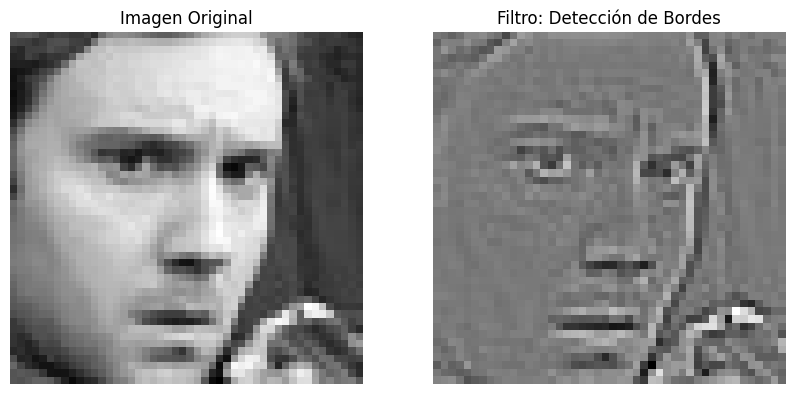

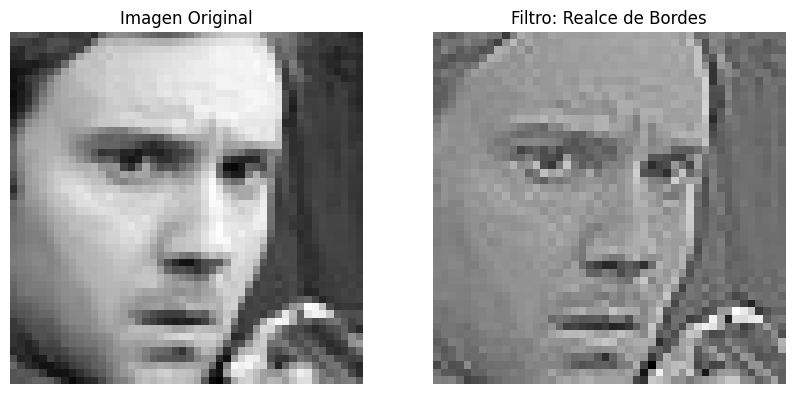

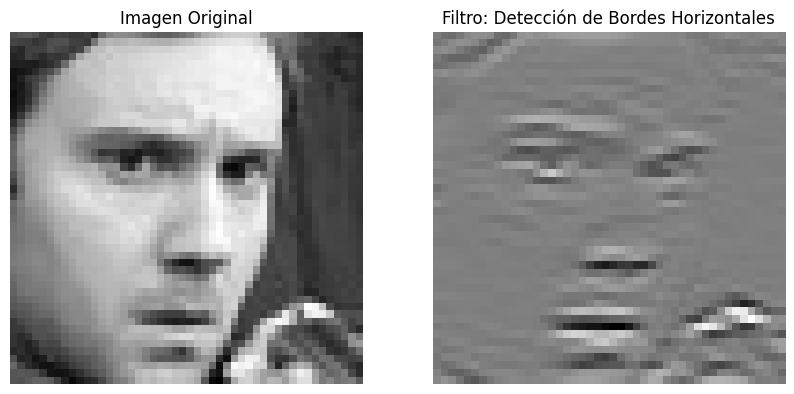

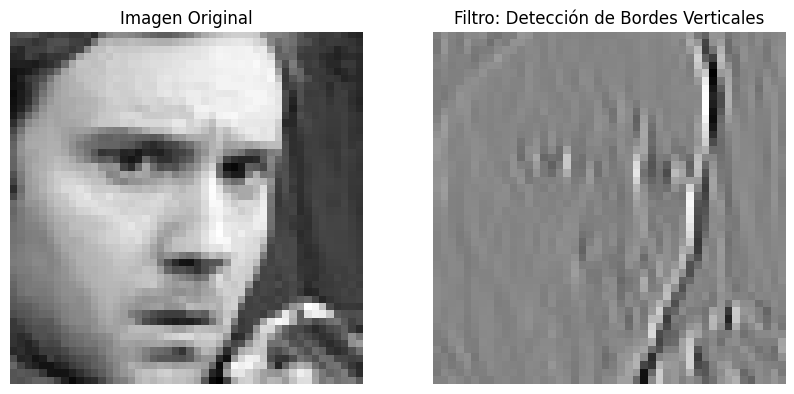

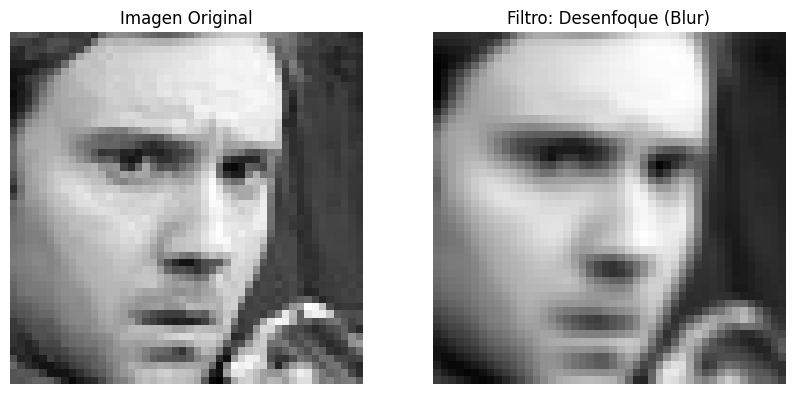

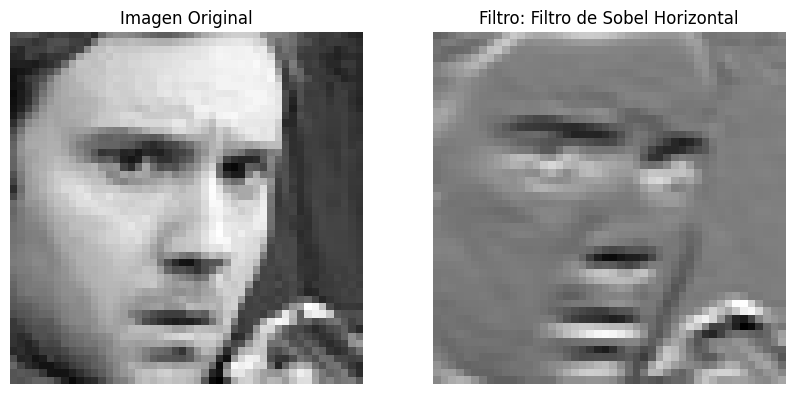

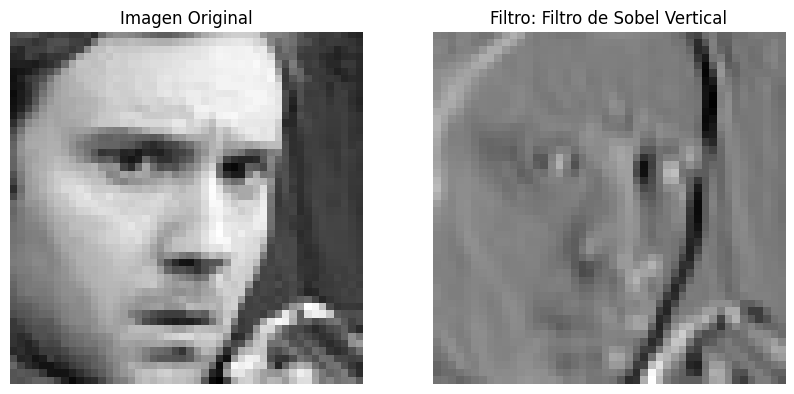

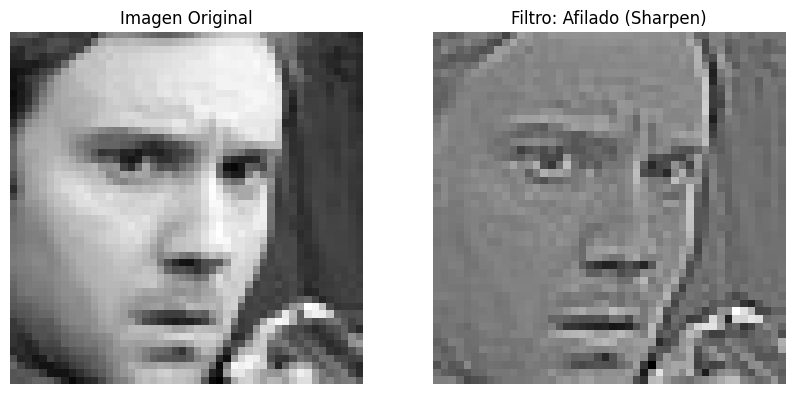

In [10]:
filtros = {
    "Detección de Bordes": np.array([
        [-1, -1, -1],
        [-1,  8, -1],
        [-1, -1, -1]
    ]),
    "Realce de Bordes": np.array([
        [0, -1,  0],
        [-1, 5, -1],
        [0, -1,  0]
    ]),
    "Detección de Bordes Horizontales": np.array([
        [-1, -1, -1],
        [ 2,  2,  2],
        [-1, -1, -1]
    ]),
    "Detección de Bordes Verticales": np.array([
        [-1, 2, -1],
        [-1, 2, -1],
        [-1, 2, -1]
    ]),
    "Desenfoque (Blur)": np.array([
        [1/9, 1/9, 1/9],
        [1/9, 1/9, 1/9],
        [1/9, 1/9, 1/9]
    ]),
    "Filtro de Sobel Horizontal": np.array([
        [-1, -2, -1],
        [ 0,  0,  0],
        [ 1,  2,  1]
    ]),
    "Filtro de Sobel Vertical": np.array([
        [-1,  0,  1],
        [-2,  0,  2],
        [-1,  0,  1]
    ]),
    "Afilado (Sharpen)": np.array([
        [-1, -1, -1],
        [-1,  9, -1],
        [-1, -1, -1]
    ])
}

for k,v in filtros.items():
    # Aplicar la convolución
    resultado = aplicar_filtro_conv(imagen, v)

    # Mostrar la imagen original y el resultado
    plt.figure(figsize=(10, 5))
    plt.subplot(1, 2, 1)
    plt.imshow(imagen, cmap='gray')
    plt.title('Imagen Original')
    plt.axis('off')

    plt.subplot(1, 2, 2)
    plt.imshow(resultado, cmap='gray')
    plt.title(f'Filtro: {k}')
    plt.axis('off')

    plt.show()